In [ ]:
pip install nlpaug

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import nlpaug.augmenter.word as naw
 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding,LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
train_data=pd.read_csv("/content/drive/MyDrive/NLP PROJECT/TWiTTER/train.csv")
test_data=pd.read_csv("/content/drive/MyDrive/NLP PROJECT/TWiTTER/test.csv")

In [ ]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
train_data.shape

(31962, 3)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# **PREPROCESSiNG TRAiNG DATA**

In [ ]:
clean_data = train_data.append(test_data,ignore_index= True)

In [ ]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
# remove twitter handles (@user)
clean_data['clean_tweet'] = np.vectorize(remove_pattern)(clean_data['tweet'], "@user[\w]*")

In [ ]:
clean_data.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
# remove special characters, numbers and punctuations
clean_data['clean_tweet'] = clean_data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
clean_data.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [ ]:
# remove short words
clean_data['clean_tweet'] = clean_data['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
clean_data.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [ ]:
# individual words considered as tokens
tokenized_tweet = clean_data['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [ ]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
clean_data['clean_tweet'] = tokenized_tweet
clean_data.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


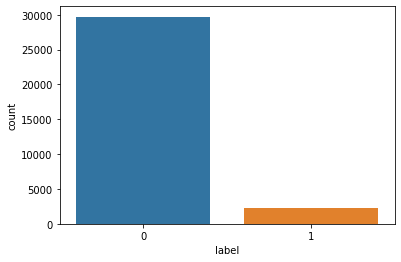

In [ ]:
clean_data.label.value_counts()
sns.countplot(x = 'label',data = train_data)

# **DATA BALANCiNG (USiNG TEXT AUGUMENTATION)**





In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# nplaug
import nltk
nltk.download('averaged_perceptron_tagger')
data_resampled_nlpaug = train_data.copy()

aug_texts = []
minority_data = data_resampled_nlpaug[data_resampled_nlpaug['label'] == 1]
aug = naw.SynonymAug(aug_src='wordnet')

texts = minority_data['tweet'].tolist()

for text in texts:
    augmented_texts = aug.augment(text, n=12)
    
    for augmented in augmented_texts:
        aug_texts.append(augmented)

print(len(aug_texts))

temp = pd.DataFrame({
    'tweet': aug_texts
})
        
temp['label'] = 1
        
data_resampled_nlpaug = pd.concat([data_resampled_nlpaug, temp], axis=0)
data_resampled_nlpaug = data_resampled_nlpaug.reset_index()
data_resampled_nlpaug = data_resampled_nlpaug.drop(columns=['index'])
del temp, minority_data

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
26904


Text(0, 0.5, 'Count')

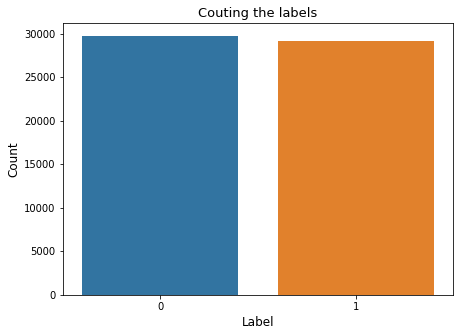

In [ ]:
plt.figure(figsize=(7, 5))
plt.title('Couting the labels', fontsize=13)
sns.countplot(data=data_resampled_nlpaug, x='label')
plt.xlabel('Label',fontsize=12)
plt.ylabel('Count', fontsize=12)

In [ ]:
counts = pd.DataFrame({
    'Label': data_resampled_nlpaug['label'].value_counts().index,
    'Count': data_resampled_nlpaug['label'].value_counts().values,
    'Percentage':  data_resampled_nlpaug['label'].value_counts().values/data_resampled_nlpaug.shape[0]
})

counts.head()

,Label,Count,Percentage
0,0,29720,0.504875
1,1,29146,0.495125


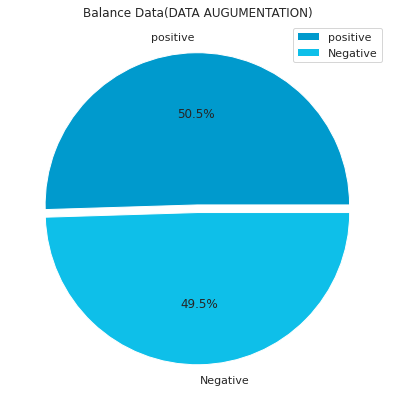

In [ ]:
sns.set(style="whitegrid")
labels = ["positive", "Negative"]
size = data_resampled_nlpaug["label"].value_counts(sort=True)
colors =['#009ACD','#0EBFE9']
explode = (0.05,0)

plt.figure(figsize=(7,7))
plt.pie(size,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')

plt.title('Balance Data(DATA AUGUMENTATION)')
plt.legend()
plt.show()

# **EXPLORATORY DATA ANALYSiS**

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

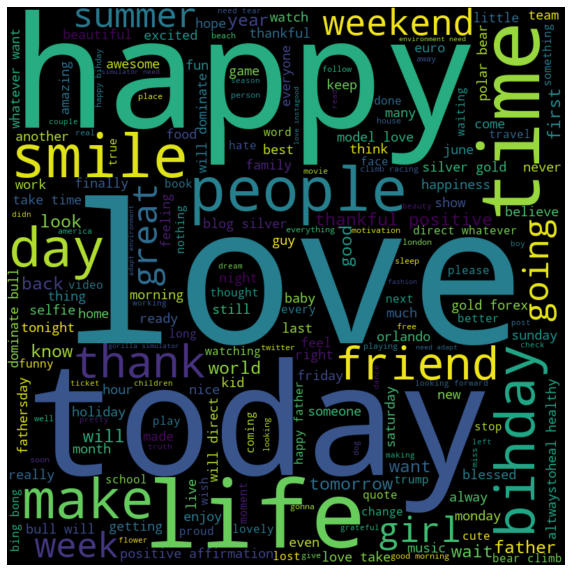

In [ ]:
wc = WordCloud(width=800, 
               height=800,
               background_color="black",
               min_font_size=10)

positive_reviews = " ".join(clean_data[clean_data["label"] == 0]["clean_tweet"])

wc.generate(positive_reviews)

plt.figure(figsize=(10,12))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

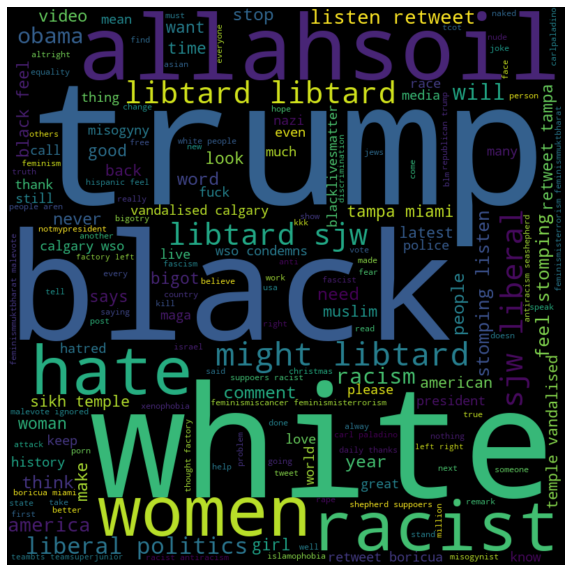

In [ ]:
wc = WordCloud(width=800, 
               height=800, 
               background_color="black",
               min_font_size=10)

negative_reviews = " ".join(clean_data[clean_data["label"] == 1]["clean_tweet"])

wc.generate(negative_reviews)

plt.figure(figsize=(10,12))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

# **CREATiNG MACHiNE LEARNiNG MODEL**

In [ ]:
X = data_resampled_nlpaug["tweet"]
y = data_resampled_nlpaug["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# CountVectorizer
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [ ]:
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_cv, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20      9000
           1       0.52      1.00      0.68      8660

    accuracy                           0.55     17660
   macro avg       0.76      0.55      0.44     17660
weighted avg       0.76      0.55      0.43     17660



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# TfidfVectorizer
tf = TfidfVectorizer(stop_words= 'english', ngram_range= (1,3), lowercase= True, max_features= 5000)
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_tf, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc.predict(X_test_tf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9000
           1       0.97      0.95      0.96      8660

    accuracy                           0.96     17660
   macro avg       0.96      0.96      0.96     17660
weighted avg       0.96      0.96      0.96     17660



# **CREATiNG NEURALNETWORK MODEL**

In [ ]:
# Processing text

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
vocabulary = tokenizer.index_word
vocabulary

{1: 'user',
 2: 'the',
 3: 'to',
 4: 'a',
 5: '\x80',
 6: 'you',
 7: 'of',
 8: 'in',
 9: 'and',
 10: '¦',
 11: "'",
 12: 'i',
 13: 'for',
 14: 'is',
 15: 'be',
 16: 'on',
 17: 'this',
 18: 'â',
 19: 'my',
 20: 'that',
 21: 'are',
 22: 'it',
 23: 'with',
 24: 'amp',
 25: 's',
 26: 'all',
 27: 'we',
 28: 'love',
 29: 'so',
 30: 'your',
 31: 'have',
 32: 'at',
 33: 'if',
 34: 'day',
 35: 'by',
 36: 'not',
 37: 't',
 38: 'me',
 39: 'what',
 40: 'trump',
 41: 'like',
 42: 'as',
 43: 'do',
 44: 'just',
 45: 'from',
 46: 'they',
 47: 'when',
 48: 'libtard',
 49: 'up',
 50: 'will',
 51: 'no',
 52: 'how',
 53: 'but',
 54: '\x9f',
 55: 'out',
 56: 'happy',
 57: 'ð',
 58: 'u',
 59: 'exploiter',
 60: 'about',
 61: 'substance',
 62: 'am',
 63: 'abuser',
 64: 'drug',
 65: 'get',
 66: 'his',
 67: 'one',
 68: 'was',
 69: 'white',
 70: 'new',
 71: 'people',
 72: 'can',
 73: 'time',
 74: 'black',
 75: 'make',
 76: 'who',
 77: 'our',
 78: 'good',
 79: 'more',
 80: 'an',
 81: 'life',
 82: '2',
 83: 'allah

In [ ]:
vocab_len = len(vocabulary)
vocab_len

41102

In [ ]:
train_sequence = tokenizer.texts_to_sequences(X_train)

In [ ]:
doc_len = []
for doc in train_sequence:
    doc_len.append(len(doc))

In [ ]:
max(doc_len)

68

In [ ]:
np.quantile(doc_len, 0.99)

30.0

In [ ]:
max_len = 30

In [ ]:
train_sequence_matrix = sequence.pad_sequences(train_sequence, maxlen= max_len)

In [ ]:
train_sequence_matrix

array([[    0,     0,     0, ...,   114,  1226,  2525],
       [    0,     0,     0, ...,   335,   334,   411],
       [    0,     0,     0, ...,     1,     1,  5572],
       ...,
       [    0,     0,     0, ...,   145, 13929, 41098],
       [    0,     0,     0, ..., 41101, 16258, 41102],
       [    0,     0,     0, ..., 17584,  7020,   893]], dtype=int32)

In [ ]:
# testing
test_sequence = tokenizer.texts_to_sequences(X_test)
test_sequence_matrix = sequence.pad_sequences(test_sequence, maxlen= max_len)

In [ ]:
test_sequence_matrix

array([[   11,    37,    15, ...,  7506,     5,    10],
       [    0,     0,     0, ...,    14,  2272,   173],
       [    0,     0,     0, ...,  8078,     5,    10],
       ...,
       [    0,     0,     0, ...,  2981,   751,  2426],
       [    0,     0,     0, ...,     3,     2,  1551],
       [    0,     0,     0, ..., 15390,   240, 11580]], dtype=int32)

In [ ]:
# LSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_len+1,output_dim=100,input_length=max_len,mask_zero=True))
model.add(LSTM(32, activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy")
trained_model=model.fit(train_sequence_matrix,y_train, batch_size=32,epochs=10)

Epoch 1/10
1288/1288 [==============================] - 86s 64ms/step - loss: 0.1062
Epoch 2/10
1288/1288 [==============================] - 82s 64ms/step - loss: 0.0210
Epoch 3/10
1288/1288 [==============================] - 82s 64ms/step - loss: 0.0079
Epoch 4/10
1288/1288 [==============================] - 82s 64ms/step - loss: 0.0045
Epoch 5/10
1288/1288 [==============================] - 82s 64ms/step - loss: 0.0030
Epoch 6/10
1288/1288 [==============================] - 82s 63ms/step - loss: 0.0025
Epoch 7/10
1288/1288 [==============================] - 81s 63ms/step - loss: 0.0021
Epoch 8/10
1288/1288 [==============================] - 81s 63ms/step - loss: 0.0020
Epoch 9/10
1288/1288 [==============================] - 81s 63ms/step - loss: 0.0011
Epoch 10/10
1288/1288 [==============================] - 81s 63ms/step - loss: 0.0010


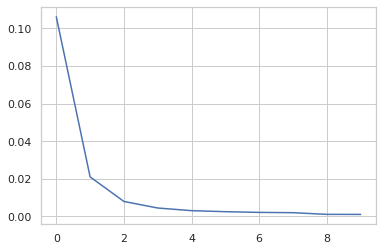

In [ ]:
plt.plot(trained_model.history["loss"])

In [ ]:
y_pred = model.predict(test_sequence_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      9000
           1       0.97      0.99      0.98      8660

    accuracy                           0.98     17660
   macro avg       0.98      0.98      0.98     17660
weighted avg       0.98      0.98      0.98     17660



# **PREPROCESSiNG TESTiNG DATA**

In [ ]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
# remove twitter handles (@user)
test_data['clean_tweet'] = np.vectorize(remove_pattern)(test_data['tweet'], "@[\w]*")

In [ ]:
test_data.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
# remove special characters, numbers and punctuations
test_data['clean_tweet'] = test_data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
test_data.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your #acne #altwaystohe...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd #bihday to my amazing hilarious #nephew...


In [ ]:
# remove short words
test_data['clean_tweet'] = test_data['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
test_data.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone #birds #mov...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways heal your #acne #altwaystoheal #heal...
3,31966,is the hp and the cursed child book up for res...,cursed child book reservations already where w...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",#bihday amazing hilarious #nephew ahmir uncle ...


In [ ]:
# individual words considered as tokens
tokenized_tweet = test_data['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#studiolife, #aislife, #requires, #passion, #...
1    [#white, #supremacists, want, everyone, #birds...
2    [safe, ways, heal, your, #acne, #altwaystoheal...
3    [cursed, child, book, reservations, already, w...
4    [#bihday, amazing, hilarious, #nephew, ahmir, ...
Name: clean_tweet, dtype: object

In [ ]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
test_data['clean_tweet'] = tokenized_tweet
test_data.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone #birds #mov...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways heal your #acne #altwaystoheal #heal...
3,31966,is the hp and the cursed child book up for res...,cursed child book reservations already where w...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",#bihday amazing hilarious #nephew ahmir uncle ...


In [ ]:
test=test_data.clean_tweet

In [ ]:
# Processing text
# testing
test_sequence = tokenizer.texts_to_sequences(test)
test_sequence_matrix = sequence.pad_sequences(test_sequence, maxlen= max_len)

In [ ]:
y_pred=model.predict(test_sequence_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [ ]:
print(y_pred)

[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
test['label'] = (y_pred >= 0.5).astype(np.int)

In [ ]:
predictions = pd.DataFrame(y_pred, columns=['Prediction'])


In [ ]:
df = pd.concat([test, predictions], axis =1)

In [ ]:
df.head()

,clean_tweet,Prediction
0,#studiolife #aislife #requires #passion #dedic...,0.0
1,#white #supremacists want everyone #birds #mov...,1.0
2,safe ways heal your #acne #altwaystoheal #heal...,0.0
3,cursed child book reservations already where w...,0.0
4,#bihday amazing hilarious #nephew ahmir uncle ...,0.0
